# Limit equilibrium method

© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/EAFIT_slope_stability/blob/main/notebooks/limit_equilibrium_method.ipynb).

This notebook depends on:
* pyCSS by [Suarez-Burgoa & Montoya-Araque (2016)](https://doi.org/10.15446/rev.fac.cienc.v5n2.59914); credits to [@aarizat](https://github.com/aarizat) for the first PyPI package release (v0.1.0). Users can also access the [original release](https://github.com/eamontoyaa/pyCSS/tree/v0.0.9) asocciated with the article, and the [Spanish-version manual](https://github.com/eamontoyaa/pyCSS/blob/master/other_files/pyCSSmanualSpanish.pdf).
* Other packages for general scientific programming in Python

## pyCSS

![Figure: Slope geometry variables](https://raw.githubusercontent.com/eamontoyaa/pyCSS/master/other_files/figures/slope_geometry.svg)

## Required modules and initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from shapely.geometry import Polygon, LineString
from ipywidgets import interact, widgets

from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    run('pip install pycss-lem', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()

from pycss_lem import get_fos, get_min_fos

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
html_setup = '<style> div.jupyter-widgets.widget-label {display: none;} </style>'

## Inputs for analyzing one circular failure surface

### Poject data

In [2]:
projectName = "Slope stability class at EAFIT"
projectAuthor = "EAFIT"
projectDate = time.strftime("%d/%m/%y")  # Automatic date

### Slope geometry

In [3]:
slopeHeight = [5, 'm']
slopeDip = [1.5, 1.0]
crownDist = [10, 'm']
toeDist = [5, 'm']
wantAutomaticToeDepth = False
toeDepth = [5, 'm']

### Watertable

In [4]:
wantWatertable = True
wtDepthAtCrown = [4.0, 'm']
toeUnderWatertable = False

### Materials properties

In [5]:
waterUnitWeight = [9.8, 'kN/m3']
materialUnitWeight = [17, 'kN/m3']
frictionAngleGrad = [27, 'degrees']
cohesion = [5, 'kPa']

### Advanced inputs

In [6]:
wantConstSliceWidthTrue = True
numSlices = 15  # Number of discretizations of slip surface
nDivs = numSlices  # Number of discretizations of circular arcs
methodString = 'Allm'  # Select the method to calcualte Fs ['Flns', 'Bshp' or 'Allm']
# Select the output format image 
outputFormatImg = '.svg'  # ['.eps', '.jpeg', '.jpg', '.pdf', '.pgf', '.png', '.ps', '.raw', '.rgba', '.svg', '.svgz', '.tif', '.tiff']

## Assessment of a single potential circular failure surface

### Geomoetry of the circular failure surface

In [7]:
hztDistPointAtCrownFromCrown = [-5, 'm']
hztDistPointAtToeFromCrown = [7.5, 'm']
slipRadius = [12, 'm']

### Running stability analysis

Analysis successfully performed!


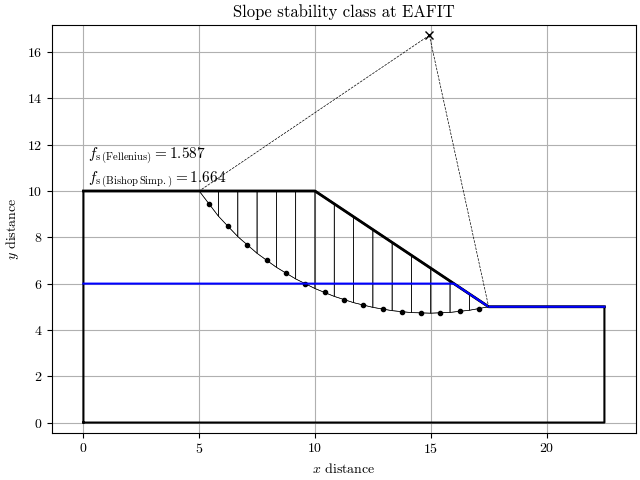

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [8]:
msg = get_fos(
    projectName,
    projectAuthor,
    projectDate,
    slopeHeight,
    slopeDip,
    crownDist,
    toeDist,
    wantAutomaticToeDepth,
    toeDepth,
    hztDistPointAtCrownFromCrown,
    hztDistPointAtToeFromCrown,
    slipRadius,
    wantWatertable,
    wtDepthAtCrown,
    toeUnderWatertable,
    waterUnitWeight,
    materialUnitWeight,
    frictionAngleGrad,
    cohesion,
    wantConstSliceWidthTrue,
    numSlices,
    nDivs,
    methodString,
    outputFormatImg
)
fig = plt.gcf()
plt.show()
display(wgt.HTML(html_setup))
plt.close()
# fig.set_size_inches(18.5, 10.5)

## Assessment of a multiple potential circular failure surface for getting the minimum $f_\mathrm{s}$

### Additional inputs to control how multiple surfaces are generated and evaluated

In [9]:
numSlices = 15  # Number of discretizations of slip surface
numCircles = 500  # Number of surfaces to assess
radiusIncrement = [3, 'm']  # Length of radius increment
numberIncrements = 5  # Number of radius increment
maxFsValueCont = 3  # Mask to plot fs at screen

### Running stability analysis

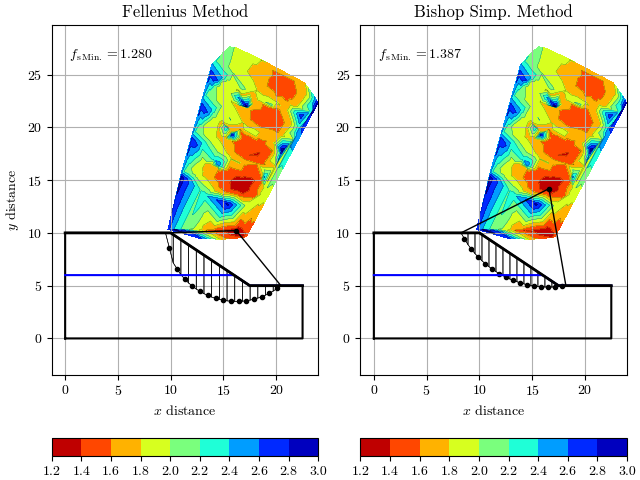

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [10]:
# %matplotlib inline 
get_min_fos(
    projectName,
    projectAuthor,
    projectDate,
    slopeHeight,
    slopeDip,
    crownDist,
    toeDist,
    wantAutomaticToeDepth,
    toeDepth,
    numCircles,
    radiusIncrement,
    numberIncrements,
    maxFsValueCont,
    wantWatertable,
    wtDepthAtCrown,
    toeUnderWatertable,
    waterUnitWeight,
    materialUnitWeight,
    frictionAngleGrad,
    cohesion,
    wantConstSliceWidthTrue,
    numSlices,
    nDivs,
    methodString,
    outputFormatImg,
)
fig = plt.gcf()
plt.show()
display(wgt.HTML(html_setup))
plt.close()
# fig.set_size_inches(18.5, 10.5)